##Importing Modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image
!python3.7 -m pip install --upgrade pip
!pip install pywaffle
from pywaffle import Waffle 
from sklearn.model_selection import train_test_split
from math import sqrt
from google.colab import drive
import sklearn
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTETomek
import seaborn as sns
from collections import Counter
import warnings
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from numpy import arange
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings("ignore")

     |████████████████████████████████| 1.7 MB 5.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 526 kB 5.0 MB/s            


##Reading the data

In [24]:
df = pd.read_csv('indian_food.csv')
df=df.replace(-1,"-1")
df=df.replace("-1",np.nan)

df[df['region'].isnull()]
df['region'] = df['region'].replace(np.nan, 'North')
df[df['state'].isnull()]
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
1015,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5.0,30.0,sweet,dessert,Assam,North East
1016,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20.0,60.0,sweet,dessert,Goa,West
1017,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,NaN,NaN,sweet,dessert,Jammu & Kashmir,North
1018,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20.0,45.0,sweet,dessert,Madhya Pradesh,Central


##Preprocessing the Data

In [25]:
df=df[:255]
ingredients = sorted(set(",".join(df.ingredients).split(",")))

for issue in ingredients:
    df[issue] = df.ingredients.str.contains(issue).astype(int)
del df['ingredients']
org_df = df.copy()
df = df.dropna(how='any',axis=0) 

#Predicting Region

In [26]:
# split a dataset into train and test sets
X = df.drop(columns=['region']).copy()
y = df['region']
X = pd.get_dummies(X)

##Oversampling

In [28]:
from imblearn.over_sampling import RandomOverSampler

ovr_smple = RandomOverSampler(random_state=42)
X, y = ovr_smple.fit_resample(X, y)

We removed State column to make the prediction of Region precisely

In [29]:
org_X = X.copy()
for i in X:
    if i.startswith('state'):
        del X[i]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 20, stratify = y)
y_train=y_train.values
y_test=y_test.values

##Random Forest

accuracy 83.33333333333334
score 0.8333333333333334
precision 0.8442067736185384
recall 0.8333333333333334
F1 Score 0.832629139975467


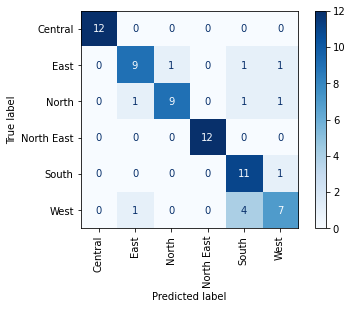

In [40]:
def performance(y_test,y_pred):
  print("accuracy",accuracy_score(y_test, y_pred)*100)
  cm=confusion_matrix(y_test,y_pred)
  # print(classification_report(y_test, y_pred))
  report = classification_report(y_test, y_pred,output_dict=True )
  return report

def RandomForest():
  model=RandomForestClassifier()
  model.fit(x_train, y_train.ravel())
  yhat = model.predict(x_test)
  report=performance(y_test,yhat)
  sklearn.metrics.plot_confusion_matrix(model, x_test, y_test, xticks_rotation='vertical', cmap=plt.cm.Blues)
  print("score",model.score(x_test,y_test))
  print("precision",sklearn.metrics.precision_score(y_test,yhat,average="macro"))
  print("recall",sklearn.metrics.recall_score(y_test,yhat,average="macro"))
  print("F1 Score",sklearn.metrics.f1_score(y_test,yhat,average="macro"))

RandomForest()

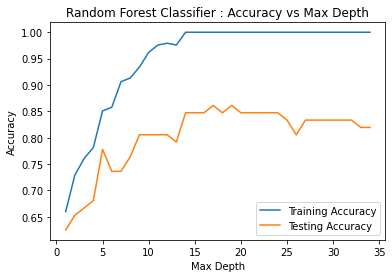

In [ ]:
def RandomForest_Accuracy_vs_Depth():
  rf_train_score=[]
  rf_test_score=[]
  for i in np.arange(1, 35):
    param_grid = {'criterion':['gini','entropy'],'max_depth': [i],'random_state':[23]}
    GS_RF=GridSearchCV(RandomForestClassifier(), param_grid,cv=5)
    GS_RF.fit(x_train,y_train.ravel())
    y_train_pred=GS_RF.predict(x_train)
    rf_train_score.append(accuracy_score(y_train,y_train_pred))
    y_pred=GS_RF.predict(x_test)
    rf_test_score.append(accuracy_score(y_test,y_pred))
  
  plt.title("Random Forest Classifier : Accuracy vs Max Depth")
  plt.xlabel("Max Depth")
  plt.ylabel("Accuracy")
  plt.plot(np.arange(1,35),rf_train_score,label="Training Accuracy")
  plt.plot(np.arange(1,35),rf_test_score,label="Testing Accuracy")
  plt.legend()
  plt.plot()
RandomForest_Accuracy_vs_Depth()

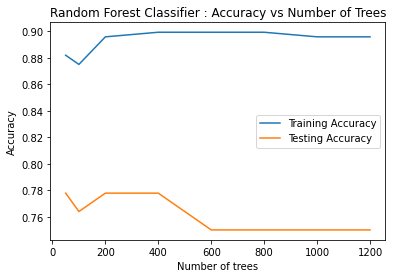

In [ ]:
def RandomForest_Accuracy_vs_Trees():
  rf_train_score=[]
  rf_test_score=[]
  n_esti=[50, 100, 200, 400, 600, 800, 1000, 1200]
  for i in n_esti:
    param_grid = {'random_state': [23], 'n_estimators': [i], 'min_samples_split': [5],'min_samples_leaf': [2], 'max_depth':[20], 'criterion': ['entropy'], 'bootstrap': ['False']}
    GS_RF=GridSearchCV(RandomForestClassifier(), param_grid,cv=5)
    GS_RF.fit(x_train,y_train.ravel())
    y_train_pred=GS_RF.predict(x_train)
    rf_train_score.append(accuracy_score(y_train,y_train_pred))
    y_pred=GS_RF.predict(x_test)
    rf_test_score.append(accuracy_score(y_test,y_pred))
    # print(rf_train_score,rf_test_score)
  
  plt.title("Random Forest Classifier : Accuracy vs Number of Trees")
  plt.xlabel("Number of trees")
  plt.ylabel("Accuracy")
  plt.plot(n_esti,rf_train_score,label="Training Accuracy")
  plt.plot(n_esti,rf_test_score,label="Testing Accuracy")
  plt.legend()
  plt.plot()
RandomForest_Accuracy_vs_Trees()

##Logistic Regression

Accuracy: 81.94444444444444
Precision: 0.8256854256854256
Recall: 0.8194444444444445
F1 Score: 0.8165637368535918


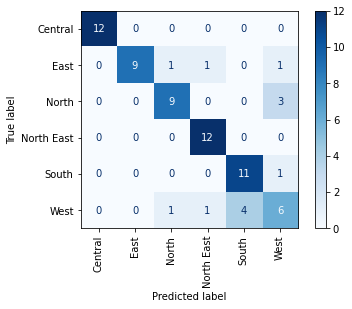

In [42]:
def Logistic_Regression():
  classifier = LogisticRegressionCV(cv=5, random_state = 0, max_iter=1000)
  classifier.fit(x_train, y_train.ravel())
  y_pred = classifier.predict(x_test)
  # print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
  print("Accuracy:", accuracy_score(y_test, y_pred)*100)
  print("Precision:", precision_score(y_test, y_pred, average='macro'))
  print("Recall:", recall_score(y_test, y_pred, average='macro'))
  print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
  # print(classification_report(y_test, y_pred))
  sklearn.metrics.plot_confusion_matrix(classifier,x_test,y_test,xticks_rotation='vertical',cmap=plt.cm.Blues)
Logistic_Regression()

##MultiLayer Perceptron

Accuracy: 80.55555555555556
Precision: 0.8246263540381188
Recall: 0.8055555555555555
F1 Score: 0.8011278571240695


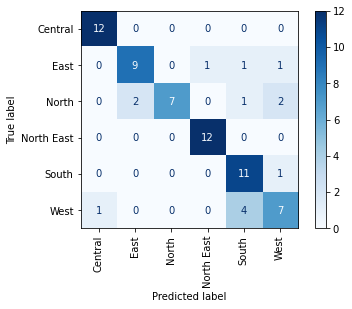

In [47]:
def MLP():
  mlp_clf = MLPClassifier(activation='relu', alpha=0.1, learning_rate_init=0.01, max_iter=1000)
  mlp_clf.fit(x_train, y_train.ravel())
  y_pred = mlp_clf.predict(x_test)
  # print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
  print("Accuracy:", accuracy_score(y_test, y_pred)*100)
  print("Precision:", precision_score(y_test, y_pred, average='macro'))
  print("Recall:", recall_score(y_test, y_pred, average='macro'))
  print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
  # print(classification_report(y_test, y_pred))
  sklearn.metrics.plot_confusion_matrix(mlp_clf,x_test,y_test,xticks_rotation='vertical',cmap=plt.cm.Blues)
MLP()

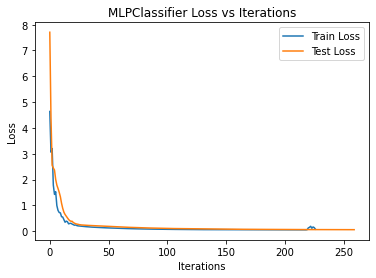

In [ ]:
def MLP_Loss_vs_Iterations():  
  mlp_clf = MLPClassifier(activation='relu', alpha=0.1, learning_rate_init=0.01, max_iter=1000)
  mlp_clf.fit(x_train, y_train.ravel())
  y_pred = mlp_clf.predict(x_test)
  plt.plot(mlp_clf.loss_curve_, label="Train Loss")
  mlp_clf.fit(x_test, y_test.ravel())
  plt.plot(mlp_clf.loss_curve_, label="Test Loss")
  plt.title("MLPClassifier Loss vs Iterations")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()
MLP_Loss_vs_Iterations()

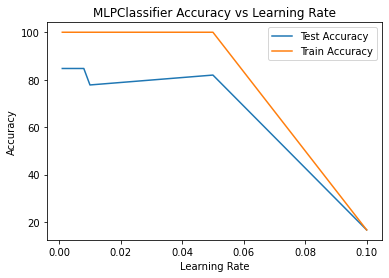

In [ ]:
def MLP_Accuracy_vs_LR():
  learning_rates = [0.001, 0.008, 0.01, 0.05, 0.1]
  acti_acc = {}
  acti_acc_train = {}
  for lr in learning_rates:
      mlp_clf = MLPClassifier(activation='relu', alpha=0.008, learning_rate_init=lr, max_iter=100)
      mlp_clf.fit(x_train, y_train.ravel())
      y_pred = mlp_clf.predict(x_test)
      acti_acc[lr] = accuracy_score(y_test, y_pred)*100
      y_pred_train = mlp_clf.predict(x_train)
      acti_acc_train[lr] = accuracy_score(y_train.ravel(), y_pred_train)*100

  plt.title("MLPClassifier Accuracy vs Learning Rate")
  plt.xlabel("Learning Rate")
  plt.ylabel("Accuracy")
  plt.plot(list(acti_acc.keys()), list(acti_acc.values()), label="Test Accuracy")
  plt.plot(list(acti_acc_train.keys()), list(acti_acc_train.values()), label="Train Accuracy")
  plt.legend()
  plt.plot()
MLP_Accuracy_vs_LR()

##Gaussian Naive Bayes

Confusion Matrix:
 [[12  0  0  0  0  0]
 [ 0 10  0  0  0  2]
 [ 0  0  8  1  0  3]
 [ 0  0  0 12  0  0]
 [ 0  2  1  0  8  1]
 [ 0  1  1  2  3  5]]
Accuracy: 76.38888888888889
Precision: 0.7585081585081584
Recall: 0.763888888888889
F1 Score: 0.7577660664617186
              precision    recall  f1-score   support

     Central       1.00      1.00      1.00        12
        East       0.77      0.83      0.80        12
       North       0.80      0.67      0.73        12
  North East       0.80      1.00      0.89        12
       South       0.73      0.67      0.70        12
        West       0.45      0.42      0.43        12

    accuracy                           0.76        72
   macro avg       0.76      0.76      0.76        72
weighted avg       0.76      0.76      0.76        72



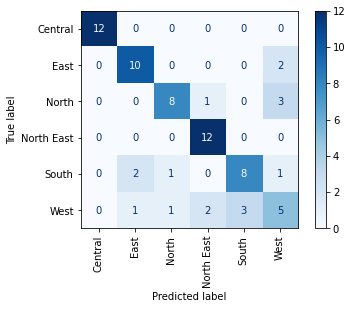

In [ ]:
from sklearn.naive_bayes import GaussianNB

def Naive_Bayes():
  Gmodel = GaussianNB()
  Gmodel.fit(x_train,y_train.ravel())
  y_pred = Gmodel.predict(x_test)
  print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
  print("Accuracy:", accuracy_score(y_test, y_pred)*100)
  print("Precision:", precision_score(y_test, y_pred, average='macro'))
  print("Recall:", recall_score(y_test, y_pred, average='macro'))
  print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
  print(classification_report(y_test, y_pred))
  sklearn.metrics.plot_confusion_matrix(Gmodel,x_test,y_test,xticks_rotation='vertical',cmap=plt.cm.Blues)
Naive_Bayes()

##Decision Tree

Confusion Matrix:
 [[12  0  0  0  0  0]
 [ 1  9  0  1  0  1]
 [ 0  0  8  0  1  3]
 [ 0  0  0 12  0  0]
 [ 0  0  2  0  8  2]
 [ 0  2  2  0  2  6]]
Accuracy: 76.38888888888889
Precision: 0.7597125097125098
Recall: 0.7638888888888888
F1 Score: 0.7608212560386473
              precision    recall  f1-score   support

     Central       0.92      1.00      0.96        12
        East       0.82      0.75      0.78        12
       North       0.67      0.67      0.67        12
  North East       0.92      1.00      0.96        12
       South       0.73      0.67      0.70        12
        West       0.50      0.50      0.50        12

    accuracy                           0.76        72
   macro avg       0.76      0.76      0.76        72
weighted avg       0.76      0.76      0.76        72



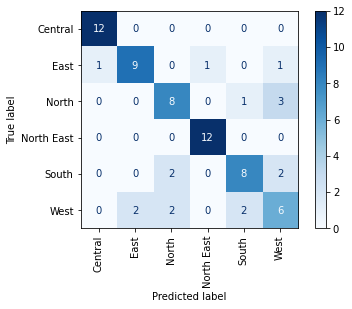

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object

def Decision_Tree():
  clf = DecisionTreeClassifier(criterion="entropy")
  clf = clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
  print("Accuracy:", accuracy_score(y_test, y_pred)*100)
  print("Precision:", precision_score(y_test, y_pred, average='macro'))
  print("Recall:", recall_score(y_test, y_pred, average='macro'))
  print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
  print(classification_report(y_test, y_pred))
  sklearn.metrics.plot_confusion_matrix(clf,x_test,y_test,xticks_rotation='vertical',cmap=plt.cm.Blues)
Decision_Tree()

In [ ]:
#Accuracy vs max-depth

def Decision_Tree_Accuracy_vs_Depth():
  rf_train_score=[]
  rf_test_score=[]
  for i in np.arange(1, 30):
    param_grid = {'criterion':['gini','entropy'],'max_depth': [i],'random_state':[2,3]}
    GS_RF=GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
    GS_RF.fit(x_train,y_train.ravel())
    y_train_pred=GS_RF.predict(x_train)
    rf_train_score.append(accuracy_score(y_train,y_train_pred))
    y_pred=GS_RF.predict(x_test)
    rf_test_score.append(accuracy_score(y_test,y_pred))
    # print(rf_train_score,rf_test_score)
  
  plt.title("DecisionTree Classifier : Accuracy vs Max Depth")
  plt.xlabel("Max Depth")
  plt.ylabel("Accuracy")
  plt.plot(np.arange(1,30),rf_train_score,label="Training Accuracy")
  plt.plot(np.arange(1,30),rf_test_score,label="Testing Accuracy")
  plt.legend()
  plt.plot()
  plt.show()
Decision_Tree_Accuracy_vs_Depth()

#Predicting Flavor Profile

In [48]:
# split a dataset into train and test sets
X = df.drop(columns=['flavor_profile']).copy()
y = df['flavor_profile']
X = pd.get_dummies(X)

##Oversampling

In [50]:
ovr_smple = RandomOverSampler(random_state=42)
X, y = ovr_smple.fit_resample(X, y)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 20, stratify = y)
y_train=y_train.values
y_test=y_test.values

##Random Forest

accuracy 100.0
Confusion matrix
[[20  0  0  0]
 [ 0 20  0  0]
 [ 0  0 21  0]
 [ 0  0  0 21]]
              precision    recall  f1-score   support

      bitter       1.00      1.00      1.00        20
        sour       1.00      1.00      1.00        20
       spicy       1.00      1.00      1.00        21
       sweet       1.00      1.00      1.00        21

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

score 1.0
precision 1.0
recall 1.0
F1 Score 1.0


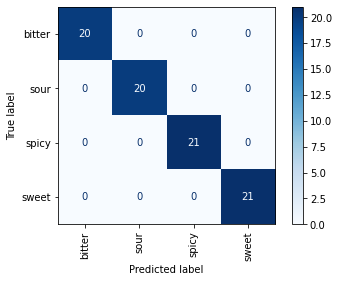

In [ ]:
RandomForest()

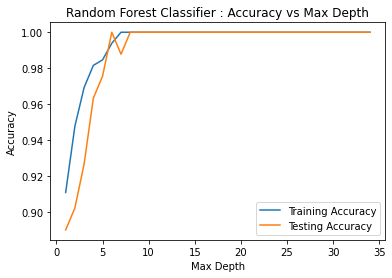

In [ ]:
RandomForest_Accuracy_vs_Depth()

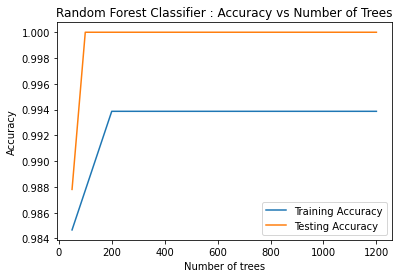

In [ ]:
RandomForest_Accuracy_vs_Trees()

##Logistic Regression

Confusion Matrix:
 [[20  0  0  0]
 [ 0 20  0  0]
 [ 1  0 20  0]
 [ 0  0  0 21]]
Accuracy: 98.78048780487805
Precision: 0.9880952380952381
Recall: 0.9880952380952381
F1 Score: 0.9878048780487805
              precision    recall  f1-score   support

      bitter       0.95      1.00      0.98        20
        sour       1.00      1.00      1.00        20
       spicy       1.00      0.95      0.98        21
       sweet       1.00      1.00      1.00        21

    accuracy                           0.99        82
   macro avg       0.99      0.99      0.99        82
weighted avg       0.99      0.99      0.99        82



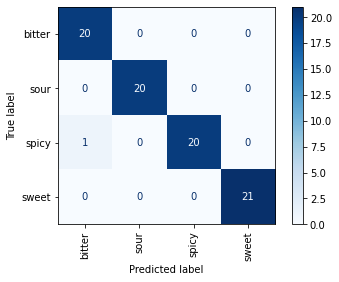

In [ ]:
Logistic_Regression()

##MultiLayer Perceptron

Confusion Matrix:
 [[20  0  0  0]
 [ 0 20  0  0]
 [ 1  0 19  1]
 [ 0  0  0 21]]
Accuracy: 97.5609756097561
Precision: 0.9767316017316018
Recall: 0.9761904761904762
F1 Score: 0.9755884855360182
              precision    recall  f1-score   support

      bitter       0.95      1.00      0.98        20
        sour       1.00      1.00      1.00        20
       spicy       1.00      0.90      0.95        21
       sweet       0.95      1.00      0.98        21

    accuracy                           0.98        82
   macro avg       0.98      0.98      0.98        82
weighted avg       0.98      0.98      0.98        82



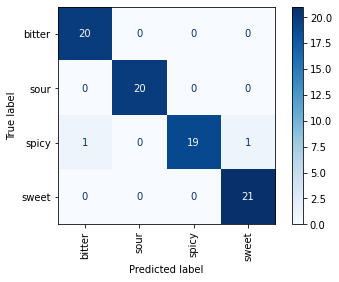

In [ ]:
MLP()

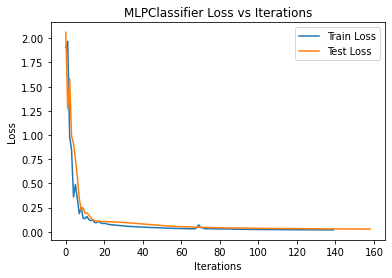

In [ ]:
MLP_Loss_vs_Iterations()

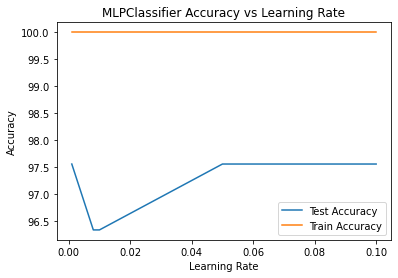

In [ ]:
MLP_Accuracy_vs_LR()

##Gaussian Naive Bayes

Confusion Matrix:
 [[20  0  0  0]
 [ 0 20  0  0]
 [ 1  0 18  2]
 [ 0  0  0 21]]
Accuracy: 96.34146341463415
Precision: 0.9663561076604555
Recall: 0.9642857142857143
F1 Score: 0.9633080334299846
              precision    recall  f1-score   support

      bitter       0.95      1.00      0.98        20
        sour       1.00      1.00      1.00        20
       spicy       1.00      0.86      0.92        21
       sweet       0.91      1.00      0.95        21

    accuracy                           0.96        82
   macro avg       0.97      0.96      0.96        82
weighted avg       0.97      0.96      0.96        82



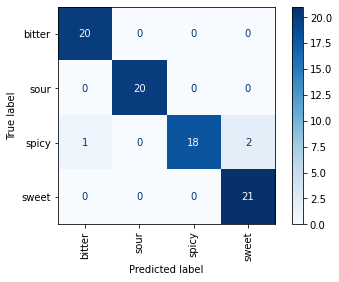

In [ ]:
Naive_Bayes()

##Decision Tree

Confusion Matrix:
 [[20  0  0  0]
 [ 0 20  0  0]
 [ 1  0 20  0]
 [ 0  0  0 21]]
Accuracy: 98.78048780487805
Precision: 0.9880952380952381
Recall: 0.9880952380952381
F1 Score: 0.9878048780487805
              precision    recall  f1-score   support

      bitter       0.95      1.00      0.98        20
        sour       1.00      1.00      1.00        20
       spicy       1.00      0.95      0.98        21
       sweet       1.00      1.00      1.00        21

    accuracy                           0.99        82
   macro avg       0.99      0.99      0.99        82
weighted avg       0.99      0.99      0.99        82



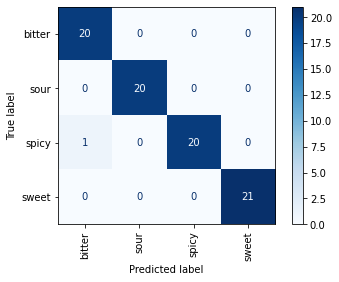

In [ ]:
Decision_Tree()

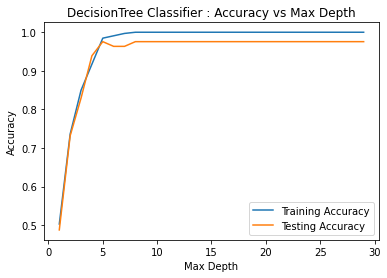

In [ ]:
Decision_Tree_Accuracy_vs_Depth()